In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv(r'D:\DUIH-AWS\1st_csv\all_f norm by eTIV.csv', index_col=False)
colums = df.columns
print(colums)
df = df.replace('<0.001', 0.001)
df = df.replace('<.01', 0.01)
df = df.replace('<0.01', 0.01)
df = df.replace('illiteracy', 0)
df[['Education', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
       'SNSB_Memory', 'SNSB_Frontal', 'FS Failed']] = df[['Education','SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal', 'FS Failed']].apply(pd.to_numeric)
       

list(df.columns)


Index(['DID', 'Age', 'Sex(M=1, F=2)', 'Education', 'Diagnosis',
       'Diagnosis_Sub', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time',
       ...
       'rh_rostralmiddlefrontal_thickness', 'rh_superiorfrontal_thickness',
       'rh_superiorparietal_thickness', 'rh_superiortemporal_thickness',
       'rh_supramarginal_thickness', 'rh_frontalpole_thickness',
       'rh_temporalpole_thickness', 'rh_transversetemporal_thickness',
       'rh_insula_thickness', 'rh_MeanThickness_thickness'],
      dtype='object', length=229)


['DID',
 'Age',
 'Sex(M=1, F=2)',
 'Education',
 'Diagnosis',
 'Diagnosis_Sub',
 'CDR',
 'GDS',
 'MMSE_Reg',
 'MMSE_Time',
 'MMSE_Place',
 'MMSE_Recall',
 'MMSE_Attention/Calc',
 'MMSE_Lanugage',
 'MMSE_Drawing',
 'MMSE_Total',
 'Hypertension',
 'Diabete',
 'Hyperlipidemia',
 'Alchol',
 'Smoking',
 'SNSB_Attention',
 'SNSB_Language',
 'SNSB_Visuospatial',
 'SNSB_Memory',
 'SNSB_Frontal',
 'FS Failed',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'Left-Hippocampus',
 'Left-Amygdala',
 'CSF',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right

In [53]:
round(df[colums].describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Age,166.0,73.777,10.486,27.000,66.250,76.000,81.000,97.000
"Sex(M=1, F=2)",166.0,1.687,0.465,1.000,1.000,2.000,2.000,2.000
Education,166.0,9.105,5.053,0.000,6.000,9.000,12.000,20.000
CDR,166.0,0.898,0.573,0.000,0.500,1.000,1.000,3.000
GDS,166.0,3.669,0.969,2.000,3.000,3.000,4.000,6.000
...,...,...,...,...,...,...,...,...
rh_frontalpole_thickness,163.0,0.024,0.004,0.014,0.022,0.024,0.027,0.032
rh_temporalpole_thickness,163.0,0.027,0.004,0.016,0.025,0.028,0.030,0.035
rh_transversetemporal_thickness,163.0,0.021,0.003,0.012,0.020,0.021,0.023,0.027
rh_insula_thickness,163.0,0.026,0.002,0.019,0.025,0.027,0.028,0.032


In [54]:
df.isna().sum()

DID                                0
Age                                1
Sex(M=1, F=2)                      1
Education                          1
Diagnosis                          0
                                  ..
rh_frontalpole_thickness           4
rh_temporalpole_thickness          4
rh_transversetemporal_thickness    4
rh_insula_thickness                4
rh_MeanThickness_thickness         4
Length: 229, dtype: int64

In [74]:
def draw_corr(corr):
       mask = np.triu(np.ones_like(corr, dtype=bool))
       # Set up the matplotlib figure
       f, ax = plt.subplots(figsize=(11, 9))

       # Generate a custom diverging colormap
       cmap = sns.diverging_palette(230, 20, as_cmap=True)

       # Draw the heatmap with the mask and correct aspect ratio
       sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
       

two = ['CDR',
 'GDS']

MMSE = ['MMSE_Reg',
 'MMSE_Time',
 'MMSE_Place',
 'MMSE_Recall',
 'MMSE_Attention/Calc',
 'MMSE_Lanugage',
 'MMSE_Drawing',
 'MMSE_Total']
SNSB = ['SNSB_Attention',
 'SNSB_Language',
 'SNSB_Visuospatial',
 'SNSB_Memory',
 'SNSB_Frontal']

lh_DK_vol = ['lh_bankssts_volume',
 'lh_caudalanteriorcingulate_volume',
 'lh_caudalmiddlefrontal_volume',
 'lh_cuneus_volume',
 'lh_entorhinal_volume',
 'lh_fusiform_volume',
 'lh_inferiorparietal_volume',
 'lh_inferiortemporal_volume',
 'lh_isthmuscingulate_volume',
 'lh_lateraloccipital_volume',
 'lh_lateralorbitofrontal_volume',
 'lh_lingual_volume',
 'lh_medialorbitofrontal_volume',
 'lh_middletemporal_volume',
 'lh_parahippocampal_volume',
 'lh_paracentral_volume',
 'lh_parsopercularis_volume',
 'lh_parsorbitalis_volume',
 'lh_parstriangularis_volume',
 'lh_pericalcarine_volume',
 'lh_postcentral_volume',
 'lh_posteriorcingulate_volume',
 'lh_precentral_volume',
 'lh_precuneus_volume',
 'lh_rostralanteriorcingulate_volume',
 'lh_rostralmiddlefrontal_volume',
 'lh_superiorfrontal_volume',
 'lh_superiorparietal_volume',
 'lh_superiortemporal_volume',
 'lh_supramarginal_volume',
 'lh_frontalpole_volume',
 'lh_temporalpole_volume',
 'lh_transversetemporal_volume',
 'lh_insula_volume']

rh_DK_vol = ['rh_bankssts_volume',
 'rh_caudalanteriorcingulate_volume',
 'rh_caudalmiddlefrontal_volume',
 'rh_cuneus_volume',
 'rh_entorhinal_volume',
 'rh_fusiform_volume',
 'rh_inferiorparietal_volume',
 'rh_inferiortemporal_volume',
 'rh_isthmuscingulate_volume',
 'rh_lateraloccipital_volume',
 'rh_lateralorbitofrontal_volume',
 'rh_lingual_volume',
 'rh_medialorbitofrontal_volume',
 'rh_middletemporal_volume',
 'rh_parahippocampal_volume',
 'rh_paracentral_volume',
 'rh_parsopercularis_volume',
 'rh_parsorbitalis_volume',
 'rh_parstriangularis_volume',
 'rh_pericalcarine_volume',
 'rh_postcentral_volume',
 'rh_posteriorcingulate_volume',
 'rh_precentral_volume',
 'rh_precuneus_volume',
 'rh_rostralanteriorcingulate_volume',
 'rh_rostralmiddlefrontal_volume',
 'rh_superiorfrontal_volume',
 'rh_superiorparietal_volume',
 'rh_superiortemporal_volume',
 'rh_supramarginal_volume',
 'rh_frontalpole_volume',
 'rh_temporalpole_volume',
 'rh_transversetemporal_volume',
 'rh_insula_volume']

aseg = ['Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'Left-Hippocampus',
 'Left-Amygdala',
 'CSF',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right-Accumbens-area',
 'Right-VentralDC',
 'Right-vessel',
 'Right-choroid-plexus',
 '5th-Ventricle',
 'WM-hypointensities',
 'Left-WM-hypointensities',
 'Right-WM-hypointensities',
 'non-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'Right-non-WM-hypointensities',
 'Optic-Chiasm',
 'CC_Posterior',
 'CC_Mid_Posterior',
 'CC_Central',
 'CC_Mid_Anterior',
 'CC_Anterior',
 'BrainSegVol',
 'BrainSegVolNotVent',
 'lhCortexVol',
 'rhCortexVol',
 'CortexVol',
 'lhCerebralWhiteMatterVol',
 'rhCerebralWhiteMatterVol',
 'CerebralWhiteMatterVol',
 'SubCortGrayVol',
 'TotalGrayVol',
 'SupraTentorialVol',
 'SupraTentorialVolNotVent',
 'MaskVol',
 'BrainSegVol-to-eTIV',
 'MaskVol-to-eTIV',
 'lhSurfaceHoles',
 'rhSurfaceHoles']


lh_DK_thk = ['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness',
 'lh_temporalpole_thickness',
 'lh_transversetemporal_thickness',
 'lh_insula_thickness',
 'lh_MeanThickness_thickness']

rh_DK_thk = ['rh_bankssts_thickness',
 'rh_caudalanteriorcingulate_thickness',
 'rh_caudalmiddlefrontal_thickness',
 'rh_cuneus_thickness',
 'rh_entorhinal_thickness',
 'rh_fusiform_thickness',
 'rh_inferiorparietal_thickness',
 'rh_inferiortemporal_thickness',
 'rh_isthmuscingulate_thickness',
 'rh_lateraloccipital_thickness',
 'rh_lateralorbitofrontal_thickness',
 'rh_lingual_thickness',
 'rh_medialorbitofrontal_thickness',
 'rh_middletemporal_thickness',
 'rh_parahippocampal_thickness',
 'rh_paracentral_thickness',
 'rh_parsopercularis_thickness',
 'rh_parsorbitalis_thickness',
 'rh_parstriangularis_thickness',
 'rh_pericalcarine_thickness',
 'rh_postcentral_thickness',
 'rh_posteriorcingulate_thickness',
 'rh_precentral_thickness',
 'rh_precuneus_thickness',
 'rh_rostralanteriorcingulate_thickness',
 'rh_rostralmiddlefrontal_thickness',
 'rh_superiorfrontal_thickness',
 'rh_superiorparietal_thickness',
 'rh_superiortemporal_thickness',
 'rh_supramarginal_thickness',
 'rh_frontalpole_thickness',
 'rh_temporalpole_thickness',
 'rh_transversetemporal_thickness',
 'rh_insula_thickness',
 'rh_MeanThickness_thickness']

etc = ['Age',
 'Sex(M=1, F=2)',
 'Education',
 'Hypertension',
 'Diabete',
 'Hyperlipidemia']

In [75]:
MMSE = etc 

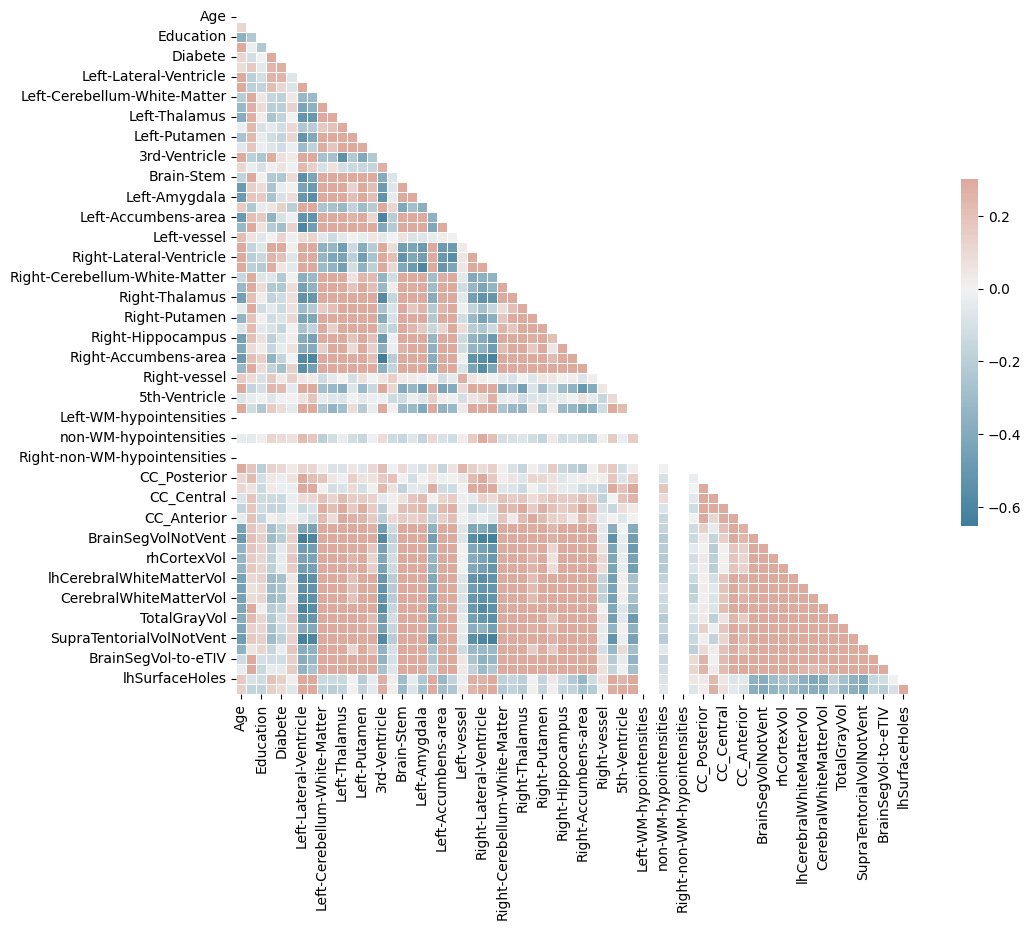

In [76]:
corr = df[MMSE+aseg].dropna().corr()

draw_corr(corr=corr)


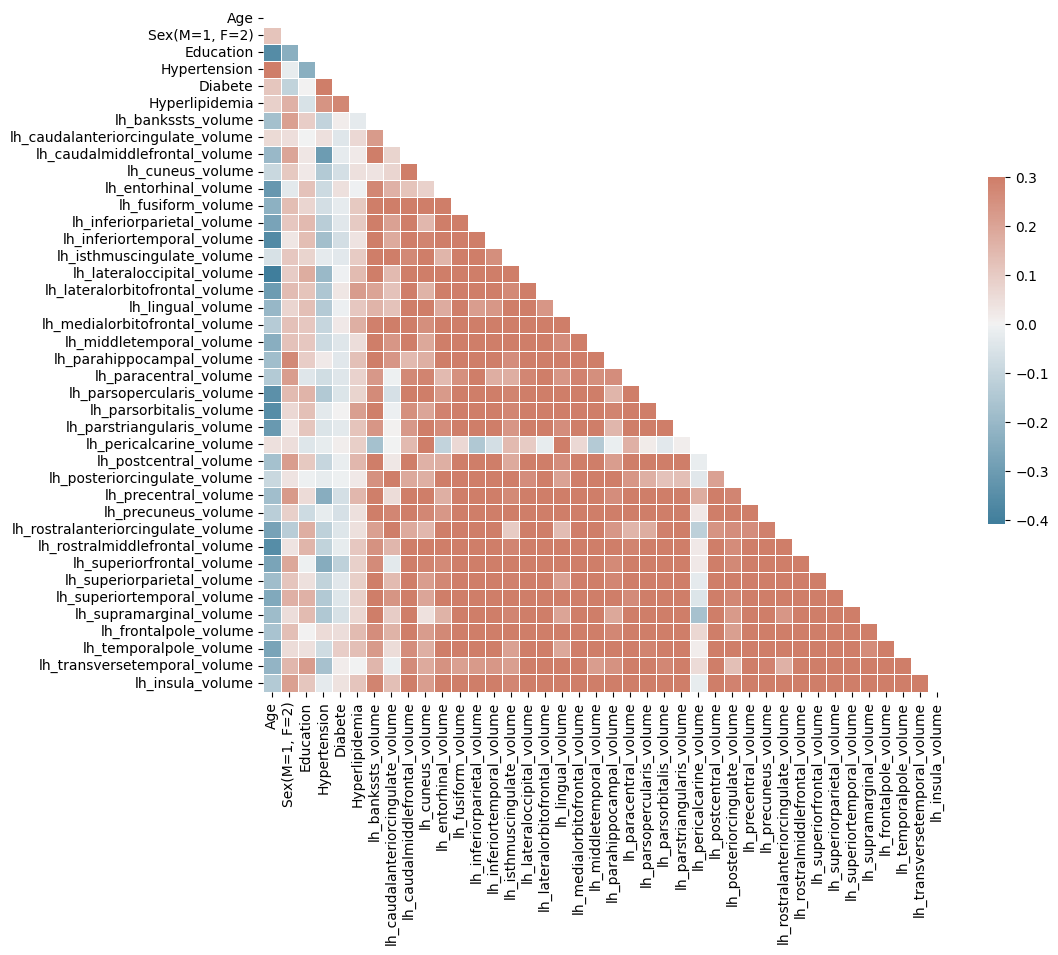

In [77]:
corr = df[MMSE+lh_DK_vol].dropna().corr()

draw_corr(corr=corr)


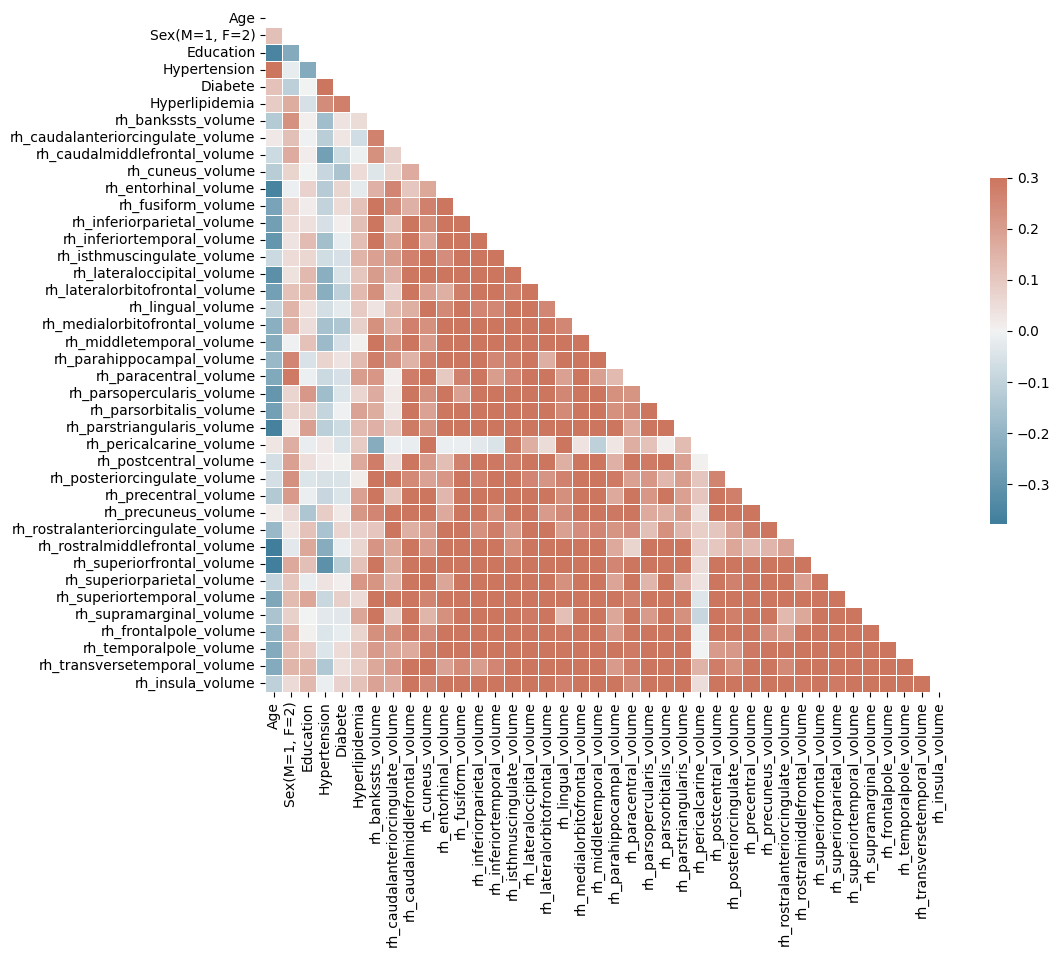

In [78]:
corr = df[MMSE+rh_DK_vol].dropna().corr()

draw_corr(corr=corr)


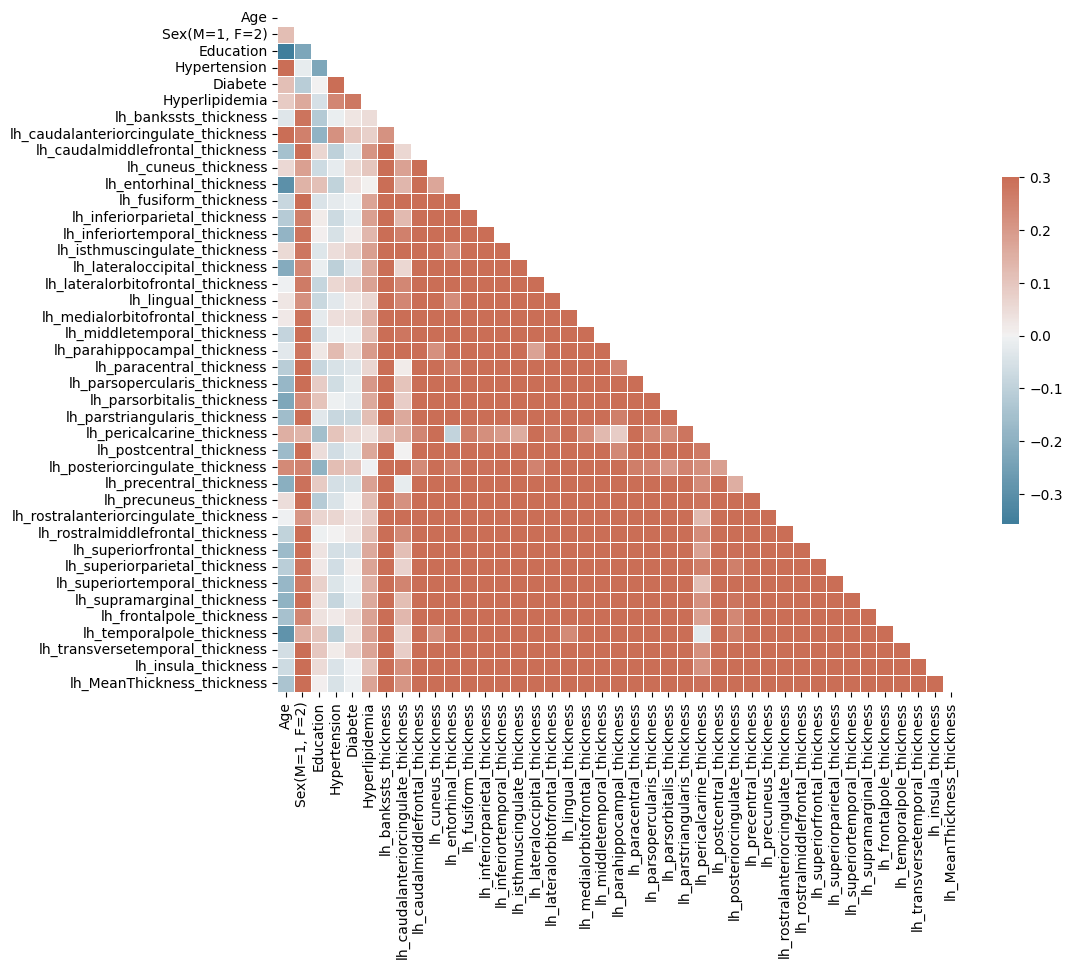

In [79]:
corr = df[MMSE+lh_DK_thk].dropna().corr()

draw_corr(corr=corr)


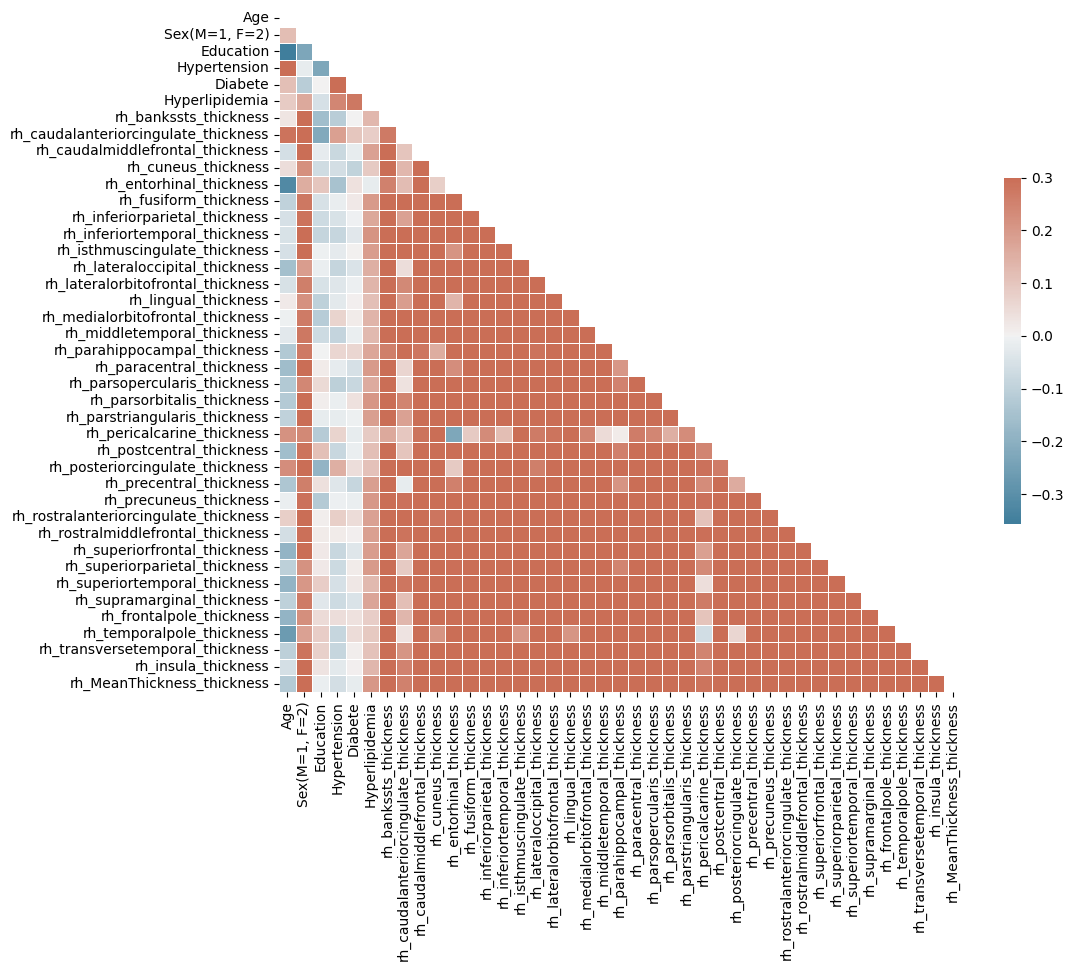

In [80]:
corr = df[MMSE+rh_DK_thk].dropna().corr()

draw_corr(corr=corr)


In [20]:
from sklearn.preprocessing import StandardScaler
df = df[targets]
raw_df = df.dropna()

scaler = StandardScaler()

raw_df[targets] = scaler.fit_transform(raw_df)
round(raw_df.describe(),3)
# draw_corr(raw_df.corr())

C:\Users\user\AppData\Local\Temp\ipykernel_18300\535672581.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df[targets] = scaler.fit_transform(raw_df)


,Age,"Sex(M=1, F=2)",Education,CDR,GDS,MMSE_Reg,MMSE_Time,MMSE_Place,MMSE_Recall,MMSE_Attention/Calc,...,Hypertension,Diabete,Hyperlipidemia,Alchol,Smoking,SNSB_Attention,SNSB_Language,SNSB_Visuospatial,SNSB_Memory,SNSB_Frontal
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,...,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,...,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005
min,-3.362,-1.524,-1.980,-1.885,-1.853,-10.100,-2.929,-4.985,-0.525,-1.644,...,-1.092,-0.797,-0.898,-0.566,-0.249,-1.204,-1.162,-0.844,-0.563,-0.702
25%,-0.663,-1.524,-0.740,-0.722,-0.637,0.099,-0.743,-0.549,-0.525,-1.064,...,-1.092,-0.797,-0.898,-0.566,-0.249,-0.843,-1.014,-0.833,-0.546,-0.686
50%,0.201,0.656,-0.119,-0.722,-0.637,0.099,0.715,0.560,-0.525,0.096,...,0.916,-0.797,-0.898,-0.566,-0.249,-0.329,-0.246,-0.568,-0.421,-0.501
75%,0.741,0.656,0.501,0.440,0.578,0.099,0.715,0.560,0.294,0.676,...,0.916,1.255,1.113,-0.566,-0.249,0.618,0.826,0.697,-0.061,0.175
max,1.497,0.656,2.155,5.090,3.010,0.099,0.715,0.560,4.387,1.256,...,0.916,1.255,1.113,1.766,4.021,2.226,1.915,2.422,4.111,2.998


In [21]:
df.dropna()

,Age,"Sex(M=1, F=2)",Education,CDR,GDS,MMSE_Reg,MMSE_Time,MMSE_Place,MMSE_Recall,MMSE_Attention/Calc,...,Hypertension,Diabete,Hyperlipidemia,Alchol,Smoking,SNSB_Attention,SNSB_Language,SNSB_Visuospatial,SNSB_Memory,SNSB_Frontal
6,87.0,2.0,0.5,1.0,4.0,3,2,3,0,1,...,1.0,0.0,0.0,0.0,0.0,25.54,40.75,1.25,0.67,6.97
9,73.0,1.0,12.0,0.5,3.0,3,5,5,1,3,...,0.0,0.0,0.0,1.0,0.0,72.53,24.55,4.91,8.76,2.90
12,73.0,2.0,6.0,1.0,4.0,3,2,4,0,1,...,0.0,0.0,0.0,0.0,1.0,7.85,2.74,0.01,0.17,0.01
20,67.0,1.0,12.0,2.0,5.0,3,1,3,0,1,...,1.0,1.0,1.0,1.0,1.0,4.63,0.01,0.01,0.01,0.01
24,78.0,2.0,12.0,1.0,4.0,3,5,4,0,1,...,1.0,1.0,1.0,0.0,0.0,38.13,21.66,58.49,0.20,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,69.0,2.0,3.0,1.0,3.0,3,3,4,0,2,...,0.0,1.0,1.0,0.0,0.0,47.42,88.03,3.15,0.14,14.74
162,68.0,1.0,20.0,1.0,5.0,3,5,5,0,3,...,0.0,1.0,0.0,0.0,1.0,74.04,0.01,0.01,0.01,0.01
164,72.0,2.0,12.0,0.5,3.0,3,4,5,1,4,...,1.0,0.0,1.0,1.0,0.0,87.27,24.55,3.94,1.11,18.79
165,82.0,2.0,12.0,1.0,4.0,3,5,5,0,3,...,1.0,0.0,0.0,0.0,0.0,9.91,0.01,0.31,0.30,0.36


In [22]:
['DID', 'Age', 'Sex(M=1, F=2)', 'Education', 'Diagnosis',
       'Diagnosis_Sub', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
       'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
       'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
       'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
       'SNSB_Memory', 'SNSB_Frontal']

# 103개 가지고 함
from sklearn.decomposition import PCA
from umap import UMAP
# 나이에 따른 주성분 분석
# 교육에 따른 주성분 분석
# CDR에 따른 주성분 분석
# GDS에 따른 주성분 분석
# MMSE_total score에 따른 주성분분석 --> drop MMSE_z

def do_PCA(name, source_list):

       pca = PCA(n_components=2)
       low_dim = pca.fit_transform(raw_df[source_list])

       pca1 = low_dim[..., 0]
       pca2 = low_dim[..., 1]
       pivot = df.dropna()[name].values

       dict = {name:pivot, 'PCA 1':pca1, 'PCA 2':pca2}
       PCA_results = pd.DataFrame(dict)
       # print(PCA_results.shape)
       sns.scatterplot(PCA_results, x='PCA 1',y='PCA 2', hue=name, palette='Spectral')
       # sns.color_palette('Spectral', as_cmap=True )
       
       plt.title(name)
       
def do_UMAP(name, source_list):

       umap = UMAP(random_state=411)
       low_dim = umap.fit_transform(raw_df[source_list])
       
       
       umap1 = low_dim[..., 0]
       umap2 = low_dim[..., 1]
       pivot = df.dropna()[name].values

       dict = {name:pivot, 'UMAP 1':umap1, 'UMAP 2':umap2}
       UMAP_results = pd.DataFrame(dict)
       # print(UMAP_results.shape)
       sns.scatterplot(UMAP_results, x='UMAP 1',y='UMAP 2', hue=name, palette='Spectral')
       plt.title(name)
       



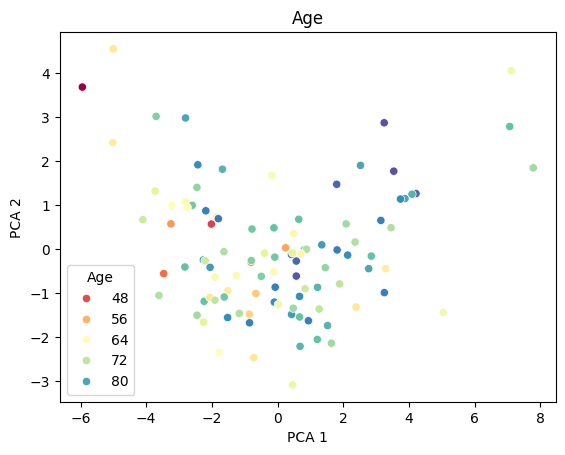

In [86]:
do_PCA(
    name='Age',
    source_list=
['Education', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

c:\Users\user\miniconda3\envs\medical\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


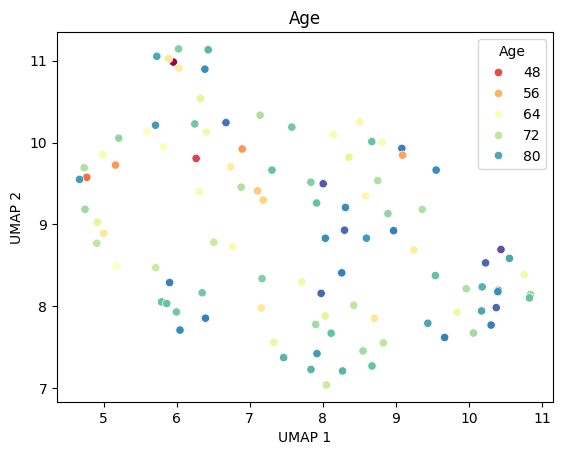

In [87]:
do_UMAP(
    name='Age',
    source_list=
['Education', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

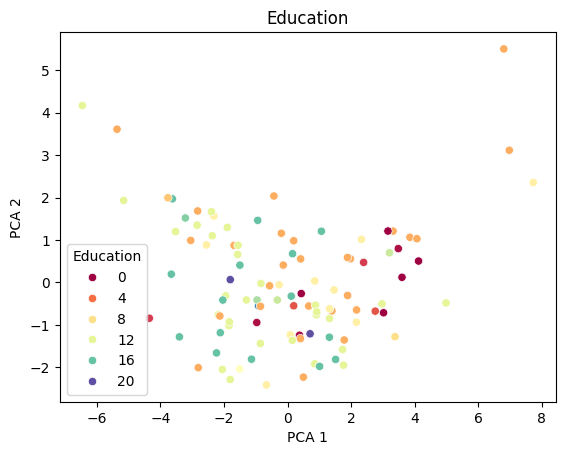

In [88]:
do_PCA(
    name='Education',
    source_list=
['Age', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

c:\Users\user\miniconda3\envs\medical\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


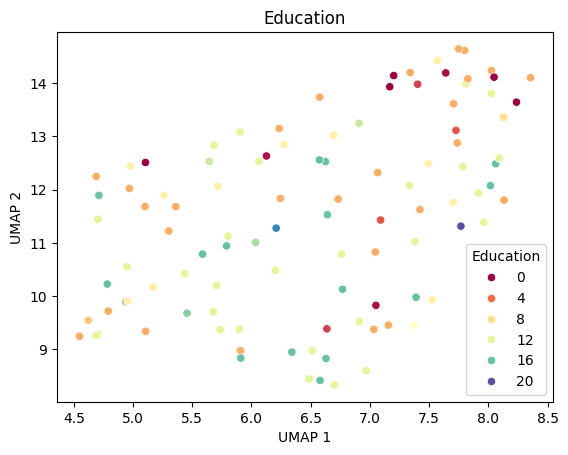

In [89]:
do_UMAP(
    name='Education',
    source_list=
['Age', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

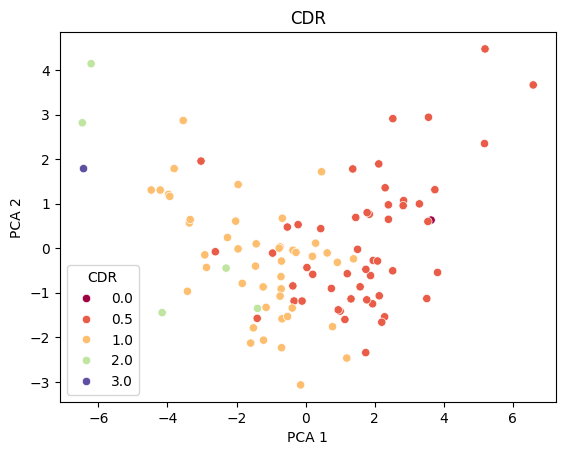

In [90]:
do_PCA(
    name='CDR',
    source_list=
['Age', 'Education', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

c:\Users\user\miniconda3\envs\medical\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


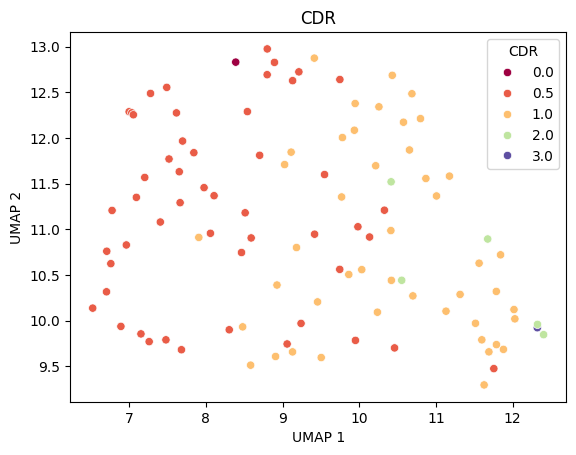

In [91]:
do_UMAP(
    name='CDR',
    source_list=
['Age', 'Education', 'GDS', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

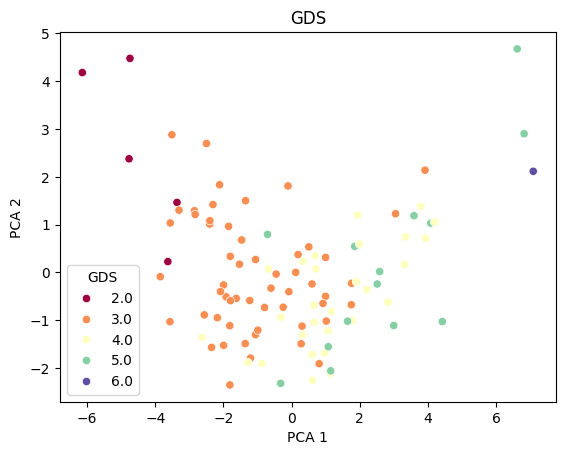

In [92]:
do_PCA(
    name='GDS',
    source_list=
['Age', 'Education', 'CDR', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

c:\Users\user\miniconda3\envs\medical\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


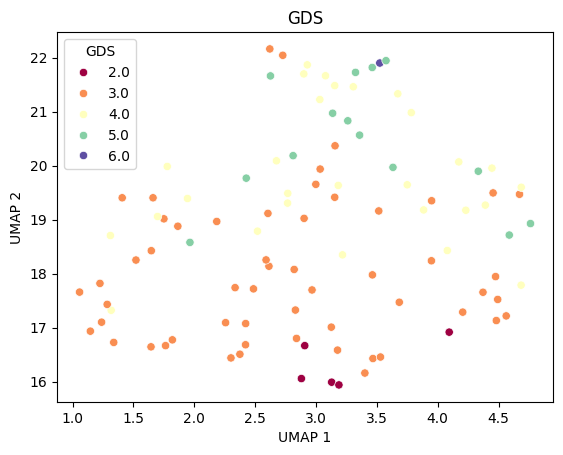

In [93]:
do_UMAP(
    name='GDS',
    source_list=
['Age', 'Education', 'CDR', 'MMSE_Reg', 'MMSE_Time', 'MMSE_Place',
              'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage', 'MMSE_Drawing',
              'MMSE_Total', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

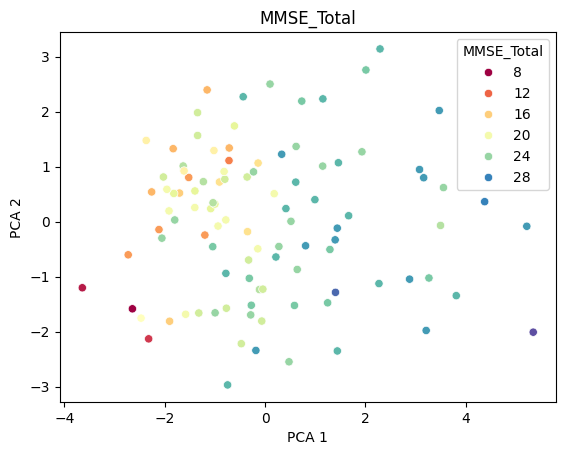

In [94]:
do_PCA(
    name='MMSE_Total',
    source_list=
['Age', 'Education', 'CDR', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)

c:\Users\user\miniconda3\envs\medical\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


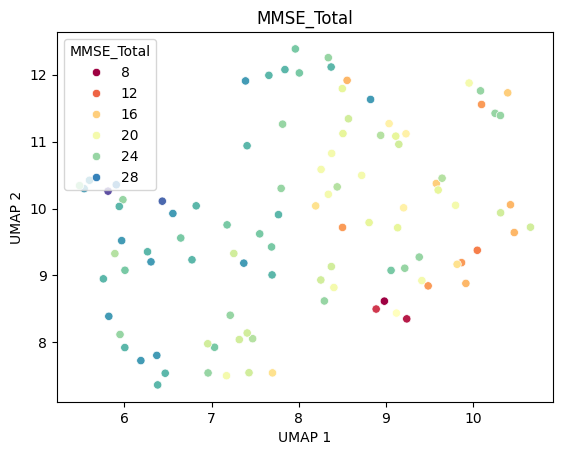

In [95]:
do_UMAP(
    name='MMSE_Total',
    source_list=
['Age', 'Education', 'CDR', 'Hypertension', 'Diabete', 'Hyperlipidemia', 'Alchol',
              'Smoking', 'SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial',
              'SNSB_Memory', 'SNSB_Frontal']
)